# Introduction

A bank experiences fraud often on a regular basis. It is important that the bank is able to recognize fraud when it occurs. This prevents headaches for the customer as it avoids them unknowingly paying for the fraudulent transaction. Automatic fraud detection minimizes downtime for the customer as the bank handles the fraud and issues a new card to the customer automatically instead of having the customer find a fraudulent transaction, contact the bank, dispute the charge and request a new card. The idea of automatic fraud detection also builds a stronger bond between the customer and the bank, thus both the bank and the customer benefit from the detection of fraud.

### Problem

The merchant, area, amount of the transaction are all possible factors which can help detect fraud. This project seeks to determine the factors which determine whether or not a transaction is fraudulent. 

### Interest

The interested party in this problem would be a bank. Fraud detection can help a bank block transactions which appear fraudulent thus alleviating much of the downtime a customer faces dealing with a false transaction.

# Data

Based on our description of the problem it is important that we get merchant information, customer name, category of the transaction, area in which the transaction took place and the amount of the transaction. 

In order to obtain this information, a [Kaggle Dataset](https://www.kaggle.com/kartik2112/fraud-detection?select=fraudTrain.csv) will be used to train and test the dataset.

The dataset contains columns: transaction date and times, credit card numbers, merchant, category, amount, first name, last name, gender, street name, city name, state, zipcode, latitude of customer, longitude of customer, city population, job of customer, date of birth, transaction number, unix time, merchant longitude and latitude, and fraud label. We must first drop columns which are redundant or appear in other forms. An example of such columns are the transaction date and times and unix time. Unix time is equivalent to transaction date and time so we only need to keep one. 

After the relevant variables are gathered, we then plot the variables against the fraud labels to determine if they have any influence on whether or not a transaction is fraud. Dropping the irrelevant variables here, give us a more rigid set of variables which we can then use for training our model.

The data then needs its categorical variables factorized so they can be used in models. Once it's all done, the data will be normalized so variables don't have more influence over others in the model. Finally, the Decision Trees, KNN, SVM and Logistic Regression models will be created using the data and the test data will be made using 10% of the dataset. The model with the highest recall score will then be the model selected as our fraud detection model.

# Methodology

Our goal of this project is to successfully predict the transactions which are fraudulent. To do this, we must have as many cases of fraud as possible to train our data. Our dataset has been pre split with training and testing data, however we will merge the data into one dataset and split it afterwards so we can ensure a random split for training and testing data. We will then perform data analysis on our dataset to determine the importance of having certain variables in our dataset. 

We will plot categorical variables against fraud categorical variable by using bar charts to compare shapes to see if there are differences in distribution. Side by side boxplots will be used to plot quantitative variables against the fraud categorical variable to see differences in distribution of data. Variables which are variations of other variables, have no variation in fraudulent transactions or are insignification will be excluded from the model. 

After the unnecessary variables are dropped from our dataset, we factorize the categorical variables to give categories a numerical representation so that they can be modelled on. Normalization will take place so variables like zip codes, which have large number values, don't have higher impact on our model than other variables like category of purchase.

Finally, since this is a classification problem, we will build a model using decision trees, KNN, SVM and logistic regression for fraud detection. Each model will then be tested by calculating it's precision, recall and f1-scores. It is important to note that since this is a fraud detection model, we want to be able to correctly label as many of the fraud cases as possible. This means we will be focusing on finding a model with the highest recall score that we can obtain as a high recall score indicates we are able to correctly predict a high amount of actual fraud transactions.

# Analysis

We must combine the data and perform analysis on the relevant variables in order to determine which variables are crucial to our model.

In [1]:
import pandas as pd
import numpy as np

We have been given train and test datasets however instead of using split tables, lets split the data ourselves later. For now we will combine both train and test datasets. Now we look at the data types in the dataset 

In [2]:
df = pd.read_csv("fraudTrain.csv")
test_df = pd.read_csv("fraudTest.csv")
df = pd.concat([df, test_df])
df.head()
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


It is likely that people have multiple credit cards who can be prone to being targets of fraudulent transactions due their usage patterns in their credit cards, so we will merge the first and last name into a name column

In [4]:
df['name'] = df['first'] + df['last']

We will drop columns which are seemingly irrelevant to the output of the model

In [5]:
drop_list = ['Unnamed: 0', 'first', 'last', 'street', 'dob', 'trans_num', 'trans_date_trans_time']
df = df.drop(drop_list, axis=1)

We can now get the counts of missing values in the dataset to determine which values we need to replace

In [6]:
missing_data = df.isnull()
for col in missing_data.columns.values.tolist():
    print(col)
    print(missing_data[col].value_counts())
    print("")

cc_num
False    1852394
Name: cc_num, dtype: int64

merchant
False    1852394
Name: merchant, dtype: int64

category
False    1852394
Name: category, dtype: int64

amt
False    1852394
Name: amt, dtype: int64

gender
False    1852394
Name: gender, dtype: int64

city
False    1852394
Name: city, dtype: int64

state
False    1852394
Name: state, dtype: int64

zip
False    1852394
Name: zip, dtype: int64

lat
False    1852394
Name: lat, dtype: int64

long
False    1852394
Name: long, dtype: int64

city_pop
False    1852394
Name: city_pop, dtype: int64

job
False    1852394
Name: job, dtype: int64

unix_time
False    1852394
Name: unix_time, dtype: int64

merch_lat
False    1852394
Name: merch_lat, dtype: int64

merch_long
False    1852394
Name: merch_long, dtype: int64

is_fraud
False    1852394
Name: is_fraud, dtype: int64

name
False    1852394
Name: name, dtype: int64



No data is missing in the data set so we are good to go.

Now we look at the data types again in the dataset to determine how to plot the variables. This is important because we can see the impact each variable has on fraudulent and non fraudulent transactions

In [7]:
df.dtypes

cc_num          int64
merchant       object
category       object
amt           float64
gender         object
city           object
state          object
zip             int64
lat           float64
long          float64
city_pop        int64
job            object
unix_time       int64
merch_lat     float64
merch_long    float64
is_fraud        int64
name           object
dtype: object

We can see that columns: zip, lat, long, merch_lat, merch_long and is_fraud are all int64 or float64 types. These values have no quantitative meaning so we should change them into object types because they represent categorical variables.

In [8]:
df[['zip', 'lat', 'long', 'merch_lat', 'merch_long', 'is_fraud']] = df[['zip', 'lat', 'long', 'merch_lat', 'merch_long', 'is_fraud']].astype("object")

We now double check to make sure the data types are in order

In [9]:
df.dtypes

cc_num          int64
merchant       object
category       object
amt           float64
gender         object
city           object
state          object
zip            object
lat            object
long           object
city_pop        int64
job            object
unix_time       int64
merch_lat      object
merch_long     object
is_fraud       object
name           object
dtype: object

Lets plot the variables to see which variables are different in fraudulent transactions compared to non-fraudulent transactions. We will use side by side boxplots for plotting a categorical variable against a quantitative variable. We will use bar charts for plotting a categorical variable against a categorical variable

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

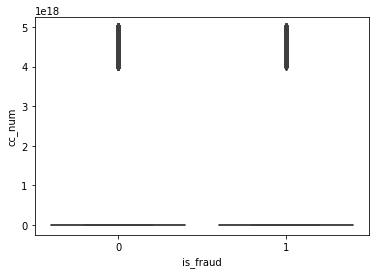

In [11]:
sns.boxplot(x="is_fraud", y="cc_num", data=df)

Here we see that the credit card number has the same formation irregardless of fraud identification. However it is possible that credit card numbers who are targetted once before can be targetted again due to the use of the bank customer so we will include it in our model as a categorical variable.

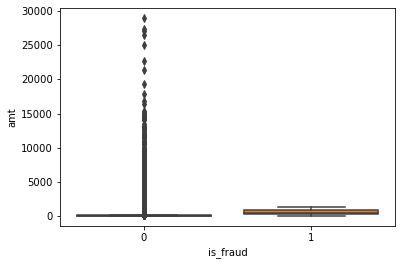

In [12]:
sns.boxplot(x="is_fraud", y="amt", data=df)

Here we see that in fraudulent cases, the cases are always values below 2500 dollars, seemingly to not raise suspicion. Non fraudulent transactions have outliers which are alot higher than 2500 dollars, however we do not see this in fraudulent cases, indicating there is a difference in amount of the transaction between fraudulent and non-fraudulent cases.

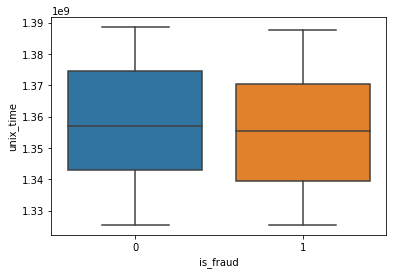

In [13]:
sns.boxplot(x="is_fraud", y="unix_time", data=df)

The time period in which fraudulent and non fraudulent transactions take place seems slightly different. The median between the two groups are slightly different and so is the Q1 and Q3 time periods. We will consider this variable in our model

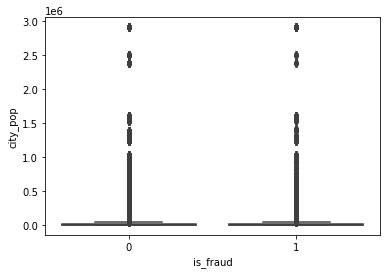

In [14]:
sns.boxplot(x="is_fraud", y="city_pop", data=df)

The city population is the same across both fraud and non fraud cases

Now we will compare categorical variables against the categorical value: is_fraud. We will plot the graph for fraudulent transactions and non fraudulent transactions and display the counts of the top 5 variables to see if there are differences between groups.

In [15]:
temp = df.loc[df['is_fraud']==1]
cat = temp[['category']]
cat = cat['category'].value_counts()
cat = cat.to_frame()
cat.index.name = 'newhead'
cat.reset_index(inplace=True)

cat.rename(columns = {'newhead': 'category', 'category': 'count'}, inplace=True)
cat.head()

,category,count
0,grocery_pos,2228
1,shopping_net,2219
2,misc_net,1182
3,shopping_pos,1056
4,gas_transport,772


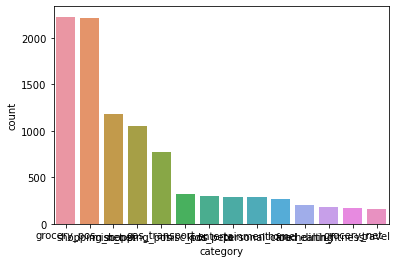

In [16]:
sns.barplot(x='category', y='count', data = cat)

In [17]:
no_fraud = df.loc[df['is_fraud']==0]
cat = no_fraud[['category']]
cat = cat['category'].value_counts()
cat = cat.to_frame()
cat.index.name = 'newhead'
cat.reset_index(inplace=True)

cat.rename(columns = {'newhead': 'category', 'category': 'count'}, inplace=True)
cat.head()

,category,count
0,gas_transport,187257
1,home,175195
2,grocery_pos,173963
3,shopping_pos,165407
4,kids_pets,161423


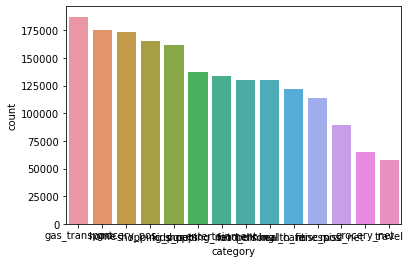

In [18]:
sns.barplot(x='category', y='count', data = cat)

Comparing non fraudulent cases to fraudulent cases, we see that most fraud occurs in the form of grocery point of sale transactions and online shopping transactions. In non fraudulent purchases, we see that gas_trasport and home transactions are the top two types of transactions. So we will consider category of purchase in our model.

In [19]:
merch = temp[['merchant']]
merch = merch['merchant'].value_counts()
merch = merch.to_frame()
merch.index.name = 'newhead'
merch.reset_index(inplace=True)

merch.rename(columns = {'newhead': 'merchant', 'merchant': 'count'}, inplace=True)
merch.head()

,merchant,count
0,fraud_Kilback LLC,62
1,fraud_Rau and Sons,60
2,fraud_Kozey-Boehm,60
3,fraud_Doyle Ltd,57
4,fraud_Terry-Huel,56


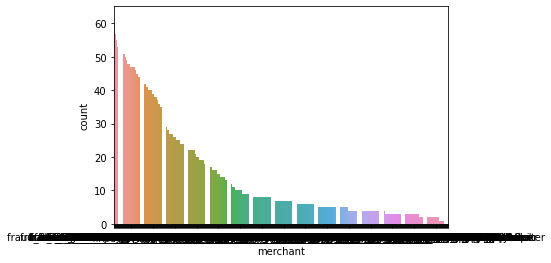

In [20]:
sns.barplot(x='merchant', y='count', data = merch)

In [21]:
merch = no_fraud[['merchant']]
merch = merch['merchant'].value_counts()
merch = merch.to_frame()
merch.index.name = 'newhead'
merch.reset_index(inplace=True)

merch.rename(columns = {'newhead': 'merchant', 'merchant': 'count'}, inplace=True)
merch.head()

,merchant,count
0,fraud_Kilback LLC,6200
1,fraud_Cormier LLC,5193
2,fraud_Schumm PLC,5154
3,fraud_Kuhn LLC,4976
4,fraud_Dickinson Ltd,4944


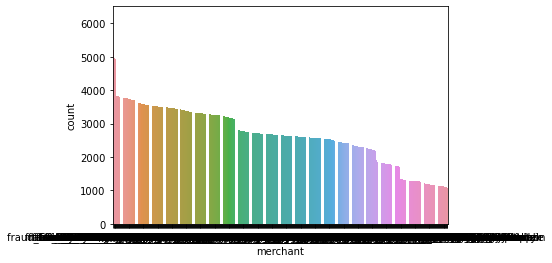

In [22]:
sns.barplot(x='merchant', y='count', data = merch)

The shape of the graph and the merchant of the transactions are also different in terms of frequency between both types of transactions. We will consider this as a variable in our model.

In [23]:
gender = temp[['gender']]
gender = gender['gender'].value_counts()
gender = gender.to_frame()
gender.index.name = 'newhead'
gender.reset_index(inplace=True)

gender.rename(columns = {'newhead': 'gender', 'gender': 'count'}, inplace=True)
gender.head()

,gender,count
0,F,4899
1,M,4752


In [24]:
gender = no_fraud[['gender']]
gender = gender['gender'].value_counts()
gender = gender.to_frame()
gender.index.name = 'newhead'
gender.reset_index(inplace=True)

gender.rename(columns = {'newhead': 'gender', 'gender': 'count'}, inplace=True)
gender.head()

,gender,count
0,F,1009850
1,M,832893


Distribution is roughly the same between M and F for non fraudulent cases. Thus as there is no variance between genders in the fraudulent cases, it is likely that the gender does not matter for selection of fraudulent cases. We will not include this variable in our model.

In [25]:
city = temp[['city']]
city = city['city'].value_counts()
city = city.to_frame()
city.index.name = 'newhead'
city.reset_index(inplace=True)

city.rename(columns = {'newhead': 'city', 'city': 'count'}, inplace=True)
city.head()

,city,count
0,Dallas,39
1,Houston,39
2,Birmingham,36
3,New York City,35
4,Camden,34


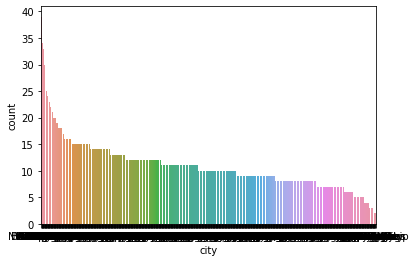

In [26]:
sns.barplot(x='city', y='count', data = city)

In [27]:
city = no_fraud[['city']]
city = city['city'].value_counts()
city = city.to_frame()
city.index.name = 'newhead'
city.reset_index(inplace=True)

city.rename(columns = {'newhead': 'city', 'city': 'count'}, inplace=True)
city.head()

,city,count
0,Birmingham,8004
1,San Antonio,7287
2,Utica,7284
3,Phoenix,7280
4,Meridian,7271


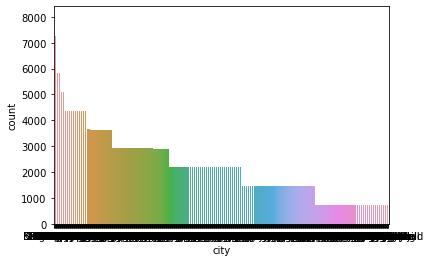

In [28]:
sns.barplot(x='city', y='count', data = city)

The may be a relationship between city and number of fraud. Houston has the most number of fraud yet it does not appear in the top 5 cities for non fraud cases. It appears that fraud cases may be linked to city so we will include this variable in our model.

In [29]:
state = temp[['state']]
state = state['state'].value_counts()
state = state.to_frame()
state.index.name = 'newhead'
state.reset_index(inplace=True)

state.rename(columns = {'newhead': 'state', 'state': 'count'}, inplace=True)
state.head()

,state,count
0,NY,730
1,TX,592
2,PA,572
3,CA,402
4,OH,360


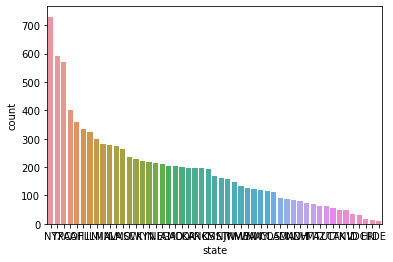

In [30]:
sns.barplot(x='state', y='count', data = state)

In [31]:
state = no_fraud[['state']]
state = state['state'].value_counts()
state = state.to_frame()
state.index.name = 'newhead'
state.reset_index(inplace=True)

state.rename(columns = {'newhead': 'state', 'state': 'count'}, inplace=True)
state.head()

,state,count
0,TX,134677
1,NY,118689
2,PA,113601
3,CA,80093
4,OH,66267


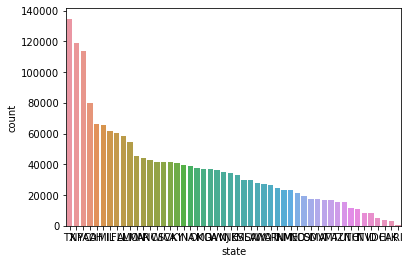

In [32]:
sns.barplot(x='state', y='count', data = state)

There appears to be more fraud in some states than others. New York has the most number of fraud

States seem very similar to each other, however NY has more fraudulent transactions than texas. There are a decent amount of samples for fraudulent purchases so it is likely that NY will have more fraud than TX. We will include this variable in our model.

In [33]:
zipc = temp[['zip']]
zipc = zipc['zip'].value_counts()
zipc = zipc.to_frame()
zipc.index.name = 'newhead'
zipc.reset_index(inplace=True)

zipc.rename(columns = {'newhead': 'zip', 'zip': 'count'}, inplace=True)
zipc

,zip,count
0,15010,24
1,48088,23
2,82514,21
3,16034,21
4,91206,20
...,...,...
958,75662,2
959,75092,2
960,85020,2
961,33811,2


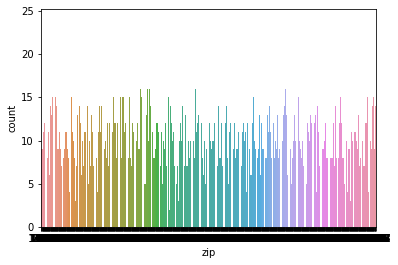

In [34]:
sns.barplot(x='zip', y='count', data = zipc)

In [35]:
zipc = no_fraud[['zip']]
zipc = zipc['zip'].value_counts()
zipc = zipc.to_frame()
zipc.index.name = 'newhead'
zipc.reset_index(inplace=True)

zipc.rename(columns = {'newhead': 'zip', 'zip': 'count'}, inplace=True)
zipc

,zip,count
0,73754,5100
1,82514,5095
2,48088,5092
3,34112,5090
4,19149,4380
...,...,...
892,35131,724
893,63829,724
894,44307,724
895,18357,723


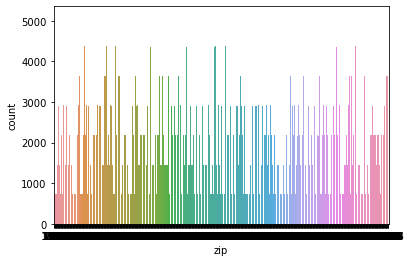

In [36]:
sns.barplot(x='zip', y='count', data = zipc)

Some zips have a high value for fraud, which could strenghten our model to have a higher weight in these areas. We will include this in our model

#### Long and Lat
We will look into longitude and latitude comparing between fraud and no fraud.

In [37]:
lat = temp[['lat']]
lat = lat['lat'].value_counts()
lat = lat.to_frame()
lat.index.name = 'newhead'
lat.reset_index(inplace=True)

lat.rename(columns = {'newhead': 'lat', 'lat': 'count'}, inplace=True)
lat

,lat,count
0,40.7687,24
1,42.5164,23
2,39.4336,23
3,40.8555,21
4,43.0048,21
...,...,...
956,33.6372,2
957,27.9865,2
958,33.5623,2
959,32.3836,2


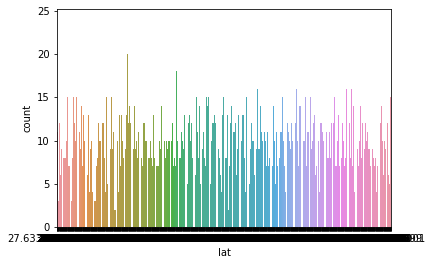

In [38]:
sns.barplot(x='lat', y='count', data = lat)

In [39]:
lat = no_fraud[['lat']]
lat = lat['lat'].value_counts()
lat = lat.to_frame()
lat.index.name = 'newhead'
lat.reset_index(inplace=True)

lat.rename(columns = {'newhead': 'lat', 'lat': 'count'}, inplace=True)
lat

,lat,count
0,36.3850,5100
1,43.0048,5095
2,42.5164,5092
3,26.1184,5090
4,40.0369,4380
...,...,...
890,36.0434,724
891,33.1044,724
892,37.7681,724
893,41.2336,723


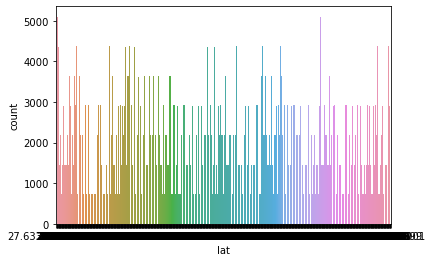

In [40]:
sns.barplot(x='lat', y='count', data = lat)

We can already see that lat shape is very similar however there is an outlier in the fraud batch which suggests there seems to be a high rate of fraud there. This seems similar to the zip code so we will omit the longitude and latitude for the zip code. Including this variable may put double the weight on location, so we will keep zip code instead of longitude and latitude.

In [41]:
job = temp[['job']]
job = job['job'].value_counts()
job = job.to_frame()
job.index.name = 'newhead'
job.reset_index(inplace=True)

job.rename(columns = {'newhead': 'job', 'job': 'count'}, inplace=True)
job

,job,count
0,Quantity surveyor,69
1,Naval architect,66
2,Materials engineer,62
3,Audiological scientist,58
4,Senior tax professional/tax inspector,57
...,...,...
489,Professor Emeritus,4
490,Corporate investment banker,4
491,Statistician,3
492,Health physicist,3


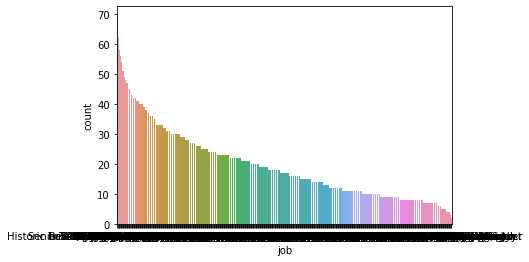

In [42]:
sns.barplot(x='job', y='count', data = job)

In [43]:
job = no_fraud[['job']]
job = job['job'].value_counts()
job = job.to_frame()
job.index.name = 'newhead'
job.reset_index(inplace=True)

job.rename(columns = {'newhead': 'job', 'job': 'count'}, inplace=True)
job

,job,count
0,Film/video editor,13846
1,Exhibition designer,13116
2,"Surveyor, land/geomatics",12386
3,Naval architect,12368
4,"Designer, ceramics/pottery",11665
...,...,...
470,Copy,726
471,Clinical cytogeneticist,726
472,"Merchandiser, retail",726
473,"Engineer, civil (consulting)",725


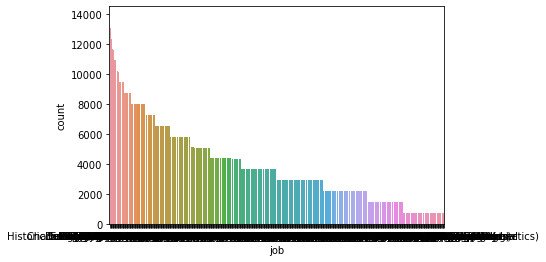

In [44]:
sns.barplot(x='job', y='count', data = job)

The charts comparing jobs between fraudulent and non fraudulent cases are extremely similar. It is likely the fraudulent purchases are not linked to the job but we will include this variable since the jobs do differ between groups in terms of count ranking between groups.

In [45]:
merch_lat = temp[['merch_lat']]
merch_lat = merch_lat['merch_lat'].value_counts()
merch_lat = merch_lat.to_frame()
merch_lat.index.name = 'newhead'
merch_lat.reset_index(inplace=True)

merch_lat.rename(columns = {'newhead': 'merch_lat', 'merch_lat': 'count'}, inplace=True)
merch_lat.head()

,merch_lat,count
0,33.029036,2
1,40.411281,2
2,45.163374,1
3,27.953876,1
4,39.018254,1


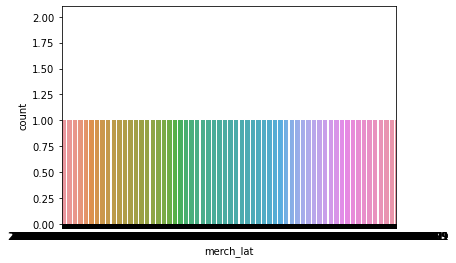

In [46]:
sns.barplot(x='merch_lat', y='count', data = merch_lat)

In [47]:
merch_lat_no_fraud = no_fraud[['merch_lat']]
merch_lat_no_fraud = merch_lat_no_fraud['merch_lat'].value_counts()
merch_lat_no_fraud = merch_lat_no_fraud.to_frame()
merch_lat_no_fraud.index.name = 'newhead'
merch_lat_no_fraud.reset_index(inplace=True)

merch_lat_no_fraud.rename(columns = {'newhead': 'merch_lat', 'merch_lat': 'count'}, inplace=True)
merch_lat_no_fraud.head(25)

,merch_lat,count
0,39.377257,4
1,41.271468,4
2,41.568128,4
3,41.910192,4
4,40.644916,4
5,40.833238,4
6,38.050673,4
7,41.218304,4
8,39.665363,4
9,39.739366,4


In [48]:
mergelat = merch_lat
same_val = mergelat.merge(merch_lat_no_fraud, on='merch_lat', how='inner')
same_val

,merch_lat,count_x,count_y
0,40.411281,2,1
1,39.018254,1,1
2,40.353338,1,1
3,46.531927,1,1
4,27.584448,1,1
...,...,...,...
973,33.648778,1,1
974,39.004103,1,2
975,39.591354,1,1
976,39.872061,1,1


There are 978 latitudes which match that of cases of non fraud. Considering these are merchants with physical locations, it is unlikely the remaining locations are solely used for fraud so we will drop merch_long and merch_lat for the additional fact that there is not much variation in purchase counts between merchants. Furthermore we already have merchant name information, so including this variable could put more weight on the merchant information than necessary, so we will not include this variable

In [49]:
merch_long = temp[['merch_long']]
merch_long = merch_long['merch_long'].value_counts()
merch_long = merch_long.to_frame()
merch_long.index.name = 'newhead'
merch_long.reset_index(inplace=True)

merch_long.rename(columns = {'newhead': 'merch_long', 'merch_long': 'count'}, inplace=True)
merch_long.head()

,merch_long,count
0,-76.926858,2
1,-82.976778,2
2,-88.951239,1
3,-83.614457,1
4,-76.322416,1


In [50]:
merch_long = no_fraud[['merch_long']]
merch_long = merch_long['merch_long'].value_counts()
merch_long = merch_long.to_frame()
merch_long.index.name = 'newhead'
merch_long.reset_index(inplace=True)

merch_long.rename(columns = {'newhead': 'merch_long', 'merch_long': 'count'}, inplace=True)
merch_long.head()


,merch_long,count
0,-81.219189,4
1,-79.147111,4
2,-80.940524,4
3,-73.900295,4
4,-74.618269,4


There is extremely little variation in merch latitude so we will omit merch latitude

### Variable Selection for Model

Based on our data analysis, the variables we will use are name, state, cc_num, amt,unix_time,category,merchant,city,job and zip. We will drop the other columns

In [51]:
df.dtypes

cc_num          int64
merchant       object
category       object
amt           float64
gender         object
city           object
state          object
zip            object
lat            object
long           object
city_pop        int64
job            object
unix_time       int64
merch_lat      object
merch_long     object
is_fraud       object
name           object
dtype: object

In [52]:
drop_list = ['gender',  'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']
new_df = df
new_df.drop(drop_list, axis=1, inplace=True)

In [53]:
new_df.head()

,cc_num,merchant,category,amt,city,state,zip,job,unix_time,is_fraud,name
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Moravian Falls,NC,28654,"Psychologist, counselling",1325376018,0,JenniferBanks
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,99160,Special educational needs teacher,1325376044,0,StephanieGill
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Malad City,ID,83252,Nature conservation officer,1325376051,0,EdwardSanchez
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Boulder,MT,59632,Patent attorney,1325376076,0,JeremyWhite
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Doe Hill,VA,24433,Dance movement psychotherapist,1325376186,0,TylerGarcia


Now we must convert our categorical values into numbers since they must be able to be used in our model. To do this, we use the factorize method in pandas to convert categorical columns in numerical columns

In [54]:
name = new_df['name']
codes_name, uniques_name = pd.factorize(name)
new_df['name'] = codes_name

In [55]:
state = new_df['state']
codes_state, uniques_state = pd.factorize(state)
new_df['state'] = codes_state

In [56]:
merchant = new_df['merchant']
codes_merchant, uniques_merchant = pd.factorize(merchant)
new_df['merchant'] = codes_merchant

In [57]:
job = new_df['job']
codes_job, uniques_job = pd.factorize(job)
new_df['job'] = codes_job

In [58]:
category = new_df['category']
codes_category, uniques_category = pd.factorize(category)
new_df['category'] = codes_category

In [59]:
city = new_df['city']
codes_city, uniques_city = pd.factorize(city)
new_df['city'] = codes_city

Now we get our y vector. This vector contains the labels for every row in our dataset. The dependent variable in our model is the 'is_fraud' column. We will use this column as our y vector and convert it to integer values 

In [60]:
y = new_df['is_fraud']
y = y.astype(int)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int32

We can now drop the is_fraud column from our matrix and label it as X

In [61]:
X = new_df.drop('is_fraud', axis=1)

We should also convert the zipcode columm to integer to be used in our model

In [62]:
zipcol = new_df['zip']
zipcol = zipcol.astype(int)
X['zip'] = zipcol

Let's have a look at the data

In [63]:
X.head()

,cc_num,merchant,category,amt,city,state,zip,job,unix_time,name
0,2703186189652095,0,0,4.97,0,0,28654,0,1325376018,0
1,630423337322,1,1,107.23,1,1,99160,1,1325376044,1
2,38859492057661,2,2,220.11,2,2,83252,2,1325376051,2
3,3534093764340240,3,3,45.00,3,3,59632,3,1325376076,3
4,375534208663984,4,4,41.96,4,4,24433,4,1325376186,4


First let's split the data into train and test data. We will then balance the training data so that there is not bias in prediction towards non fraud cases, but we will leave the test data as is so that it imitates real life. Afterwards we will preprocess our data so that all the values are normalized. We do this because values like zipcodes have very high values which when left unnormalized, can result in heavier weight in zipcode over other variables.

In [64]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

In [66]:
type(X_train)
type(y_train)
X_train.head()

,cc_num,merchant,category,amt,city,state,zip,job,unix_time,name
26326,371683116218417,255,6,22.24,694,13,8830,439,1372554485,742
241930,3506042666828517,598,11,9.97,244,9,25049,37,1379355477,244
530531,36153880429415,632,10,7.74,383,10,33809,296,1388083974,395
1101659,345060451158891,538,2,359.27,261,16,1330,212,1364992741,263
424363,4464457352619,46,6,2.92,301,10,32323,121,1386004899,305


In [67]:
X_train['is_fraud'] = y_train

<ipython-input-67-b77f02c2d850>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['is_fraud'] = y_train


In [68]:
df_fraud = X_train[X_train.is_fraud==1]
df_not_fraud = X_train[X_train.is_fraud==0]
df_not_fraud_resample = df_not_fraud.sample(replace=False, n=df_fraud.shape[0], random_state=2)
df = pd.concat([df_not_fraud_resample, df_fraud])

In [69]:
X_train.head()

,cc_num,merchant,category,amt,city,state,zip,job,unix_time,name,is_fraud
26326,371683116218417,255,6,22.24,694,13,8830,439,1372554485,742,0
241930,3506042666828517,598,11,9.97,244,9,25049,37,1379355477,244,0
530531,36153880429415,632,10,7.74,383,10,33809,296,1388083974,395,0
1101659,345060451158891,538,2,359.27,261,16,1330,212,1364992741,263,0
424363,4464457352619,46,6,2.92,301,10,32323,121,1386004899,305,0


In [70]:
y_train = X_train['is_fraud']
del X_train['is_fraud']

Here we preprocess the train and test data

In [71]:
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_train[0:5]

array([[-0.31858775, -0.38548349, -0.12845464, -0.30004444,  1.41866558,
        -0.68443808, -1.48740068,  1.89139056,  0.76308799,  1.36404384],
       [-0.31619391,  1.35566634,  1.08981301, -0.37704022, -0.56091658,
        -0.99260034, -0.88398563, -1.28248484,  1.13685826, -0.66113645],
       [-0.31884401,  1.52825845,  0.84615948, -0.39103375,  0.05055435,
        -0.91555977, -0.55807678,  0.76237518,  1.61656073, -0.04707576],
       [-0.31860809,  1.05109202, -1.10306876,  1.8148608 , -0.48613237,
        -0.45331638, -1.76643223,  0.09917734,  0.34750816, -0.58387053],
       [-0.31886821, -1.44641736, -0.12845464, -0.42127985, -0.31016951,
        -0.91555977, -0.61336223, -0.619287  ,  1.50229852, -0.4130722 ]])

We have an additional dataset which can be used as a test dataset, so we will import that and use that dataset to test our models. We also must perform the same steps we did to the training dataset so we have the same variables in each dataset.

# Model Selection and Evaluation

Our problem is a classification problem. We must choose between KNN, SVM, Decision Trees or Logistic Regression for our model. We can try each model and test the results, then we can select the model which yields the highest accuracy.

## Decision Trees

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [73]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
for i in range(1,11):
    fraudTree = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    fraudTree.fit(X_train,y_train)
    prediction = fraudTree.predict(X_test)
    print (classification_report(y_test, prediction))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    184305
           1       0.00      0.00      0.00       935

    accuracy                           0.99    185240
   macro avg       0.50      0.50      0.50    185240
weighted avg       0.99      0.99      0.99    185240

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    184305
           1       1.00      0.02      0.03       935

    accuracy                           1.00    185240
   macro avg       1.00      0.51      0.51    185240
weighted avg       1.00      1.00      0.99    185240

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    184305
           1       1.00      0.02      0.03       935

    accuracy                           1.00    185240
   macro avg       1.00      0.51      0.51    185240
weighted avg       1.00      1.00      0.99    185240

              preci

In [74]:
fraudTree = DecisionTreeClassifier(criterion="entropy", max_depth = 50)
fraudTree.fit(X_train,y_train)
prediction = fraudTree.predict(X_test)
print (classification_report(y_test, prediction))

DecisionTreeClassifier(criterion='entropy', max_depth=50)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    184305
           1       0.64      0.66      0.65       935

    accuracy                           1.00    185240
   macro avg       0.82      0.83      0.83    185240
weighted avg       1.00      1.00      1.00    185240



In [75]:
fraudTree = DecisionTreeClassifier(criterion="entropy", max_depth = 100)
fraudTree.fit(X_train,y_train)
prediction = fraudTree.predict(X_test)
print (classification_report(y_test, prediction))

DecisionTreeClassifier(criterion='entropy', max_depth=100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    184305
           1       0.64      0.66      0.65       935

    accuracy                           1.00    185240
   macro avg       0.82      0.83      0.82    185240
weighted avg       1.00      1.00      1.00    185240



In [76]:
fraudTree = DecisionTreeClassifier(criterion="entropy", max_depth = 9)
fraudTree.fit(X_train,y_train)
prediction = fraudTree.predict(X_test)
print (classification_report(y_test, prediction))

DecisionTreeClassifier(criterion='entropy', max_depth=9)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    184305
           1       0.80      0.65      0.72       935

    accuracy                           1.00    185240
   macro avg       0.90      0.83      0.86    185240
weighted avg       1.00      1.00      1.00    185240



Our results show that we were able to obtain 0.80 for precision and 0.65 for recall in fraudulent cases. This means that when we predict a fraudulent case, we are correct 80% of the time. The recall score tells us that we were able to successfully predict 65% of all fraudulent cases.

## K Nearest Neighbours

We will be creating the K Nearest Neighbours model now. We will be testing models with k values equal to 1 up to k values equal to 10.

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
k = 11
means = []
for i in range(1,k):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    knn_prediction = knn.predict(X_test)
    print('KNN results for K value: '+str(i))
    print(classification_report(y_test, knn_prediction))
    
    

KNN results for K value: 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    184305
           1       0.54      0.55      0.55       935

    accuracy                           1.00    185240
   macro avg       0.77      0.77      0.77    185240
weighted avg       1.00      1.00      1.00    185240

KNN results for K value: 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    184305
           1       0.70      0.35      0.46       935

    accuracy                           1.00    185240
   macro avg       0.85      0.67      0.73    185240
weighted avg       1.00      1.00      1.00    185240

KNN results for K value: 3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    184305
           1       0.62      0.46      0.53       935

    accuracy                           1.00    185240
   macro avg       0.81      0.73      0.76    

The highest recall score we were able to obtain in fraudulent cases is 0.55. We were able to get a precision score of 0.54 as well meaning that of all fraudulent cases, we were able to correctly identify 55% of them and we were correct 54% of the time when we labelled a transaction as fraud. This is too low, so we will not use a KNN model.

In [79]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train) 

SVC()

In [80]:
yhat_clf = clf.predict(X_test)

In [81]:
from sklearn.metrics import classification_report
print (classification_report(y_test, yhat_clf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    184305
           1       0.71      0.19      0.31       935

    accuracy                           1.00    185240
   macro avg       0.85      0.60      0.65    185240
weighted avg       0.99      1.00      0.99    185240



The SVM model was able to predict 19% of all fraudulent transactions and was 71% correct when it labelled a transaction as fraud. This means that the SVM model was predicting a low number of fraudulent cases in order to obtain higher accuracy in it's prediction. This is still very weak compared to our decision tree model which was able to predict 65% of all fraudulent transactions while being correct in it's labelling 80% of the time.

In [82]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01).fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
from sklearn.metrics import classification_report
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    184305
           1       0.00      0.00      0.00       935

    accuracy                           0.99    185240
   macro avg       0.50      0.50      0.50    185240
weighted avg       0.99      0.99      0.99    185240



The logistic regression model was unable to get any of the fraud transactions correctly labelled, so we will not consider this model.

The decision tree model was the best model we were able to create since it has the highest precision and recall of all the models we have created. This will be the model which should be chosen to perform fraud detection with the available data.

# Results

Our analysis was able to show us that the relevant variables we should use in our models were cc_num, merchant, category, amt, city, state, zip, job, unix_time, and name. Then we dropped all other variables and factorized the categorical variables so that they can be used in fitting and testing for our models. A range of values were used in our decision tree and knn models for the number of trees and K neighbours respectively. An SVM and Logistic Regresion model was also created for the data but ultimately the decision tree with 10 trees was the most successful model.

The decision tree was able to give us a precision score of 0.80 and a recall score of 0.65. The model was able to correctly label 80% of transactions it labelled as fraud, and it was able to correctly identify 65% of all fraud cases. All other models were significantly worse in recall scores and slightly worse in precision scores. This implies that the other cases were able to correctly identify the cases it labelled as fraud, but was not able to label many as fraud in the first place. Our decision tree was the only model which was able to get a decent value for it's recall score.

# Discussion
The importance of recall in our situation is that a bank should be able to correctly identify a high percentage of all fraudulent transactions made. It is not enough for a bank to simply correctly label a small percentage of all fraudulent cases. The risk of not being able to predict a high percentage of all fraudulent transactions is bad for the customer as it does not alleviate the risk that the solution was intented to fix in the first place.

It is important to note that a recall score of 0.65 is not nearly reliable enough to implement into a bank model. Thus it is important to gain additional transaction information to strenghthen this model so it will be able to detect a higher percentage of fraudulent transactions. Additional data could include, customer id so that other cards linked to the customer can be used to determine fraud in high risk customers and average spending amount to detect unusual transactions. Additional information would be greatly beneficial as more variables in the model can significantly improve the accuracy of our model thus bringing greater security to customers.

# Conclusion

The purpose of this project was to be able to create a model which would be able to correctly label fraudulent transactions as fraud. Our best model, a decision tree of depth of 9, was able to give us 80% accuracy in it's labelling when it labelled a transaction as fraud, and it was able to correctly identify 65% of all fraudulent transactions. Our model was undoubtably limited by different variables available to us in our dataset, however, it still managed to give decently accurate predicitions. Additional variables in our dataset would have given us an opportunity to add more reliability to our model, hopefully increasing our recall score. This model is helpful to banks as it allows banks to reasonably predict transactions which could be fraudulent, improving their relationship with their customers and instilling a sense of confidence in the bank.